In [1]:
%pip install nltk
%pip install pandas
%pip install tensorflow
%pip install sklearn
%pip install matplotlib

     ---------------------------------------- 1.5/1.5 MB 24.2 MB/s eta 0:00:00
     ---------------------------------------- 97.9/97.9 kB ? eta 0:00:00
     -------------------------------------- 268.0/268.0 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<h1 align='center'> Creating Text Representatios </h1>

In [2]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

spam_data = pd.read_csv("Spam-Classification.csv")
spam_data.head()

,CLASS,SMS
0,ham,"said kiss, kiss, i can't do the sound effects..."
1,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4,spam,**FREE MESSAGE**Thanks for using the Auction S...


In [3]:
spam_classes_raw = spam_data['CLASS']
spam_messages = spam_data['SMS']

In [4]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swamp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\swamp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\swamp\AppData\Roaming\nltk_data...


In [5]:
def customtokenizer(str): #Tokenizer to remove stopwords and use lemmatization
    tokens = nltk.word_tokenize(str)
    nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
    lemmatized = [lemmatizer.lemmatize(word) for word in nostop]

    return lemmatized

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=customtokenizer)

tfidf= vectorizer.fit_transform(spam_messages)

tfidf_array = tfidf.toarray()

c:\Users\swamp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [9]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
spam_classes = label_encoder.fit_transform(
                                spam_classes_raw)

#Convert target to one-hot encoding vector
spam_classes = tf.keras.utils.to_categorical(spam_classes,2)

print("TF-IDF Matrix Shape : ", tfidf.shape)
print("One-hot Encoding Shape : ", spam_classes.shape)

X_train,X_test,Y_train,Y_test = train_test_split( tfidf_array, spam_classes, test_size=0.10)

TF-IDF Matrix Shape :  (1500, 4566)
One-hot Encoding Shape :  (1500, 2)


<h1 align='center'> Building and Evaluating the Model </h1>

In [11]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

NB_CLASSES=2 #Setup Hyper Parameters for building the model
N_HIDDEN=32

model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(X_train.shape[1],),
                              name='Hidden-Layer-1',
                              activation='relu'))

model.add(keras.layers.Dense(N_HIDDEN,
                              name='Hidden-Layer-2',
                              activation='relu'))

model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 32)                146144    
                                                                 
 Hidden-Layer-2 (Dense)      (None, 32)                1056      
                                                                 
 Output-Layer (Dense)        (None, 2)                 66        
                                                                 
Total params: 147266 (575.26 KB)
Trainable params: 147266 (575.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
VERBOSE=1

BATCH_SIZE=256 #Setup Hyper Parameters for training
EPOCHS=10
VALIDATION_SPLIT=0.2

history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

Epoch 1/10
5/5 [==============================] - 0s 21ms/step - loss: 0.2514 - accuracy: 0.9889 - val_loss: 0.3217 - val_accuracy: 0.9519
Epoch 2/10
5/5 [==============================] - 0s 11ms/step - loss: 0.2151 - accuracy: 0.9907 - val_loss: 0.2943 - val_accuracy: 0.9556
Epoch 3/10
5/5 [==============================] - 0s 11ms/step - loss: 0.1834 - accuracy: 0.9917 - val_loss: 0.2701 - val_accuracy: 0.9519
Epoch 4/10
5/5 [==============================] - 0s 9ms/step - loss: 0.1558 - accuracy: 0.9926 - val_loss: 0.2477 - val_accuracy: 0.9556
Epoch 5/10
5/5 [==============================] - 0s 10ms/step - loss: 0.1319 - accuracy: 0.9917 - val_loss: 0.2294 - val_accuracy: 0.9519
Epoch 6/10
5/5 [==============================] - 0s 10ms/step - loss: 0.1117 - accuracy: 0.9954 - val_loss: 0.2138 - val_accuracy: 0.9556
Epoch 7/10
5/5 [==============================] - 0s 13ms/step - loss: 0.0946 - accuracy: 0.9963 - val_loss: 0.2009 - val_accuracy: 0.9556
Epoch 8/10
5/5 [============

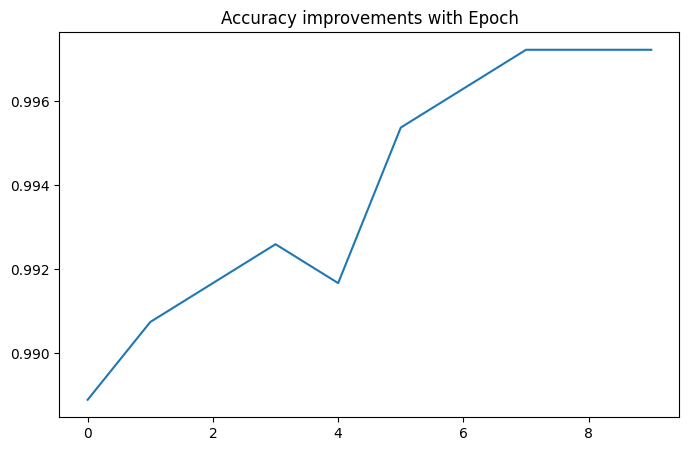

5/5 [==============================] - 0s 1ms/step - loss: 0.1381 - accuracy: 0.9800


[0.13806810975074768, 0.9800000190734863]

In [15]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

model.evaluate(X_test,Y_test)

<h1 align= 'center'> Predictions for text </h1>

In [16]:
predict_tfidf=vectorizer.transform(["FREE entry to a fun contest",
                                    "Yup I will come over"]).toarray()

print(predict_tfidf.shape)

#Predict using model
prediction=np.argmax( model.predict(predict_tfidf), axis=1 )
print("Prediction Output:" , prediction)

#Print prediction classes
print("Prediction Classes are ", label_encoder.inverse_transform(prediction))

(2, 4566)
1/1 [==============================] - 0s 65ms/step
Prediction Output: [1 0]
Prediction Classes are  ['spam' 'ham']
